# Posttest 5 - Supervised Learning
## Gempar Panggih Dwi Putra
## NIM 2009106022

# IMPORT

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# INFO DATA

In [23]:
df = pd.read_csv('clean_employee_promotion.csv')

In [24]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Female,Male,No Promoted,Has Promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.0,0,49.0,no_promoted,1.0,0.0,1.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.0,0,60.0,no_promoted,0.0,1.0,1.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.0,0,50.0,no_promoted,0.0,1.0,1.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10.0,0,50.0,no_promoted,0.0,1.0,1.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2.0,0,73.0,no_promoted,0.0,1.0,1.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  float64
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  object 
 13  Female                54808 non-null  float64
 14  Male                  54808 non-null  float64
 15  No Promoted        

## Split Data

#### Kita bakar mengukur/mempredikisi dengan data dari lima attribut numerik yaitu 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score'

#### Sedangkan Target dari pengukuran score adalah label 'is_promoted'

In [26]:
X = df[['no_of_trainings', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']]
Y = df['is_promoted']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2)

## Data Standarisasi

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled_train = ss.fit_transform(X_train)
x_scaled_test = ss.fit_transform(X_test)

## Menggunakan Dua Model Algoritma
#### Disini saya menggunakan model KNN dan Naive Bayes

## K-Nearest Neighbor (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(x_scaled_train,Y_train)

modelKnn_predic = modelKNN.predict(x_scaled_test)
akurasiKNN = accuracy_score(Y_test, modelKnn_predic)
print("Akurasi Model KNN :", round(akurasiKNN,3))

Akurasi Model KNN dengan Default Parameter : 0.916


## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
gs = GaussianNB()
gs.fit(x_scaled_train,Y_train)
gsPrediksi = gs.predict(x_scaled_test)
akurasiNB = accuracy_score(Y_test, gsPrediksi)
print("Akurasi Model Naive Bayes :", round(akurasiNB,3))

Akurasi Model Naive Bayes : 0.909


## Perbandingan Dua Algoritma
#### Pedangingan antara dua algoritma diambil dari variabel akurasiKNN dan akurasiNB yang berisikan nilai akurasi pada masing-masing model algoritma

##### Bisa dilihat dari grafik dibawah bahwa perbandingan dari nilai akurasi antara model KNN dan Naive Bayes tidak berbeda jauh, atua bahkan tidka berbeda sama sekali

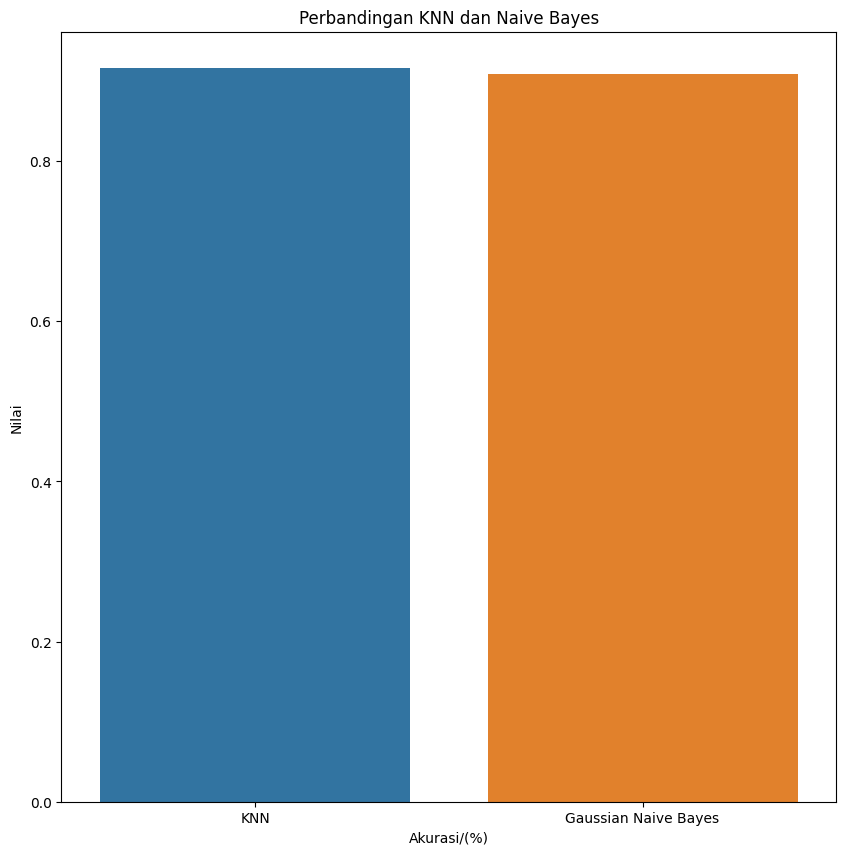

In [31]:
algoritma = ["KNN","Gaussian Naive Bayes"]
prediksi_value = [akurasiKNN,akurasiNB]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= prediksi_value)
plt.title("Perbandingan KNN dan Naive Bayes")
plt.xlabel("Akurasi/(%)")
plt.ylabel("Nilai")
plt.show()